In [1]:
# step1
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [2]:
# step2
# Total number of records
n_records = len(data)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k*1.0/(n_greater_50k+n_at_most_50k)*100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

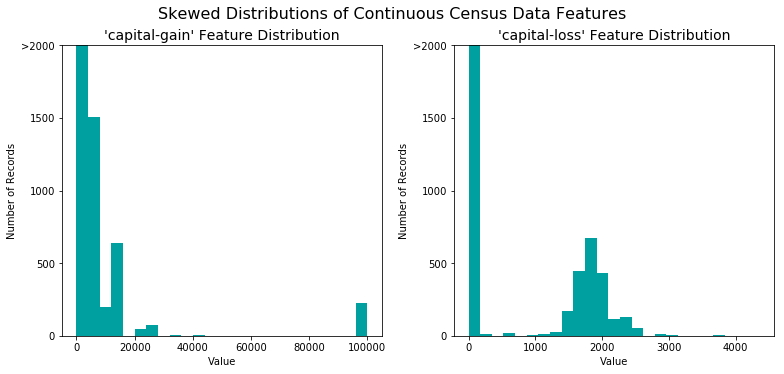

In [3]:
# step3
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

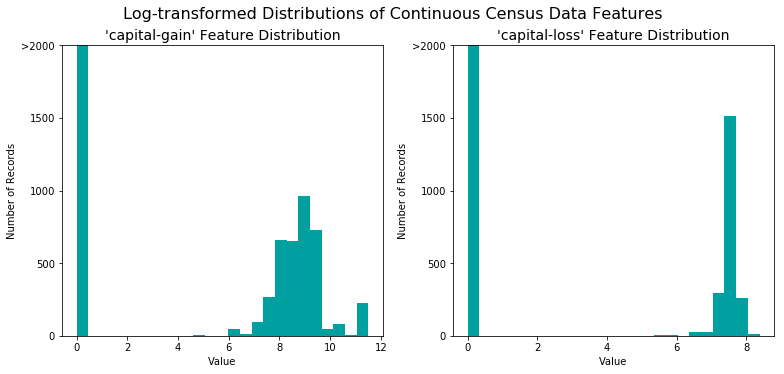

In [4]:
# step4
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [5]:
# step5
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |


In [8]:
# step6
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_raw)

# Encode the 'income_raw' data to numerical values
#income = pd.get_dummies(data['income'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
income = pd.Series(encoder.fit_transform(income_raw))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data

In [7]:
# step7
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


//anaconda/envs/py27env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor

**F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`


In [9]:
# step8
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP = np.sum(income) 
FP = income.count() - TP 
TN = 0
FN = 0

# Calculate accuracy, precision and recall
accuracy = TP*1.0/(TP+FP+TN+FN)
recall       = TP*1.0/(TP+FN)
precision = TP*1.0/(TP+FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore =(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

<b>Logistic Regression</b>

(1) GENERAL APPLICATIONS
- Logistic Regression is one of the Linear classifiers. It is sometimes used in marketing applications such as prediction of a customer's propensity to purchase a product.
https://en.wikipedia.org/wiki/Logistic_regression
https://www.quora.com/What-are-the-pros-and-cons-of-using-logistic-regression-with-one-binary-outcome-and-several-binary-predictors

(2) STRENGTHS
 - It is incredibly easy to implement and very efficient to train.
 
(3) WEAKNESSES
- We can't solve non-linear problems with logistic regression.

(4) REASONS FOR CHOOSING
-  In my experience, I understand Income increases in proportion to age, occupation and education.
   So, a linear relationship is expected between Income and these features.
   
<b>Decision Tree</b>

(1) GENERAL APPLICATIONS
- Decision trees are useful for classification and regression in many fields, including Medical diagnosis, Manufacturing, and Insurance.

(2) STRENGTHS
- Decision Trees models are interpretable, and people understand the concept of decision splits.
Can exploit high variance by using the decision tree as the base learner to an ensemble model like random forest

(3) WEAKNESSES
- Decision Trees get very complex and overfit on small/medium size datasets.
(but we can regularize a decision tree by pruning tree depth or other parameters)

(4) REASONS FOR CHOOSING
- As a non-linear classifier it may be able to predict the data well.
(Bascically occupation isn't contious number, so there is no linear relationship)
   http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics
- Also nice that it can produce a model which can be interpreted and discern rules of classification.
 
<b>Random Forest</b>

(1) GENERAL APPLICATIONS
- Random forest is a bagging technique for both classification and regression. The general concept is that you divide your data into several portions, use a relatively weak classifier/regressor to process, and then combine them. 
https://www.quora.com/What-are-the-pros-and-cons-of-GLM-vs-Random-forest-vs-SVM

(2) STRENGTHS
- The training time of Random Forest is so fast and it works well if there are many features in the dataset. 

(3) WEAKNESSES
- Results of learning are incomprehensible.
https://www.quora.com/When-is-a-random-forest-a-poor-choice-relative-to-other-algorithms
https://github.com/ctufts/Cheat_Sheets/wiki/Classification-Model-Pros-and-Cons

(4) REASONS FOR CHOOSING
Random decision forests correct for decision trees' habit of overfitting to their training set.
https://en.wikipedia.org/wiki/Random_forest


### Implementation - Creating a Training and Predicting Pipeline

 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# step9
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score 


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    #  Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    #  Calculate the training time
    results['train_time'] = end - start
        
    #  Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_test) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] = end - start
            
    #  Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train[:300])
        
    #  Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test[:300],predictions_test[:300])
    
    #  Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train[:300], 0.5)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test[:300],predictions_test[:300], 0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


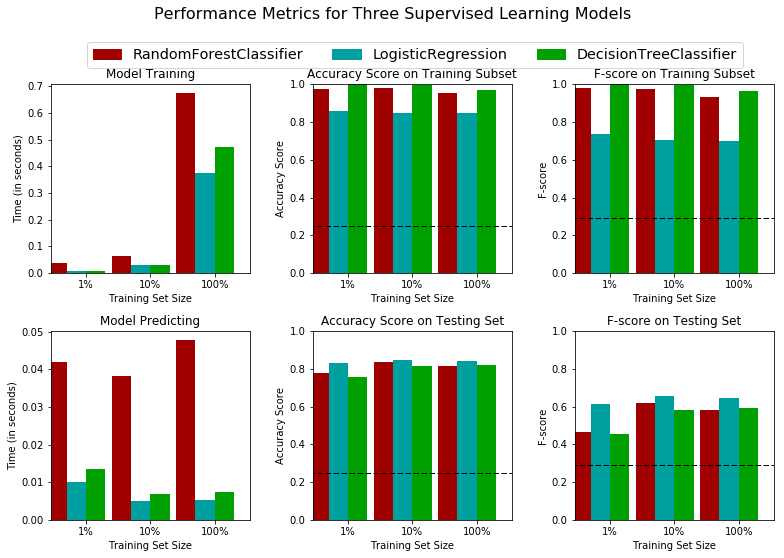

In [11]:
# step10
# 
# Before Tuning 
#

#  Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#  Initialize the three models
clf_A = LogisticRegression(random_state=0)
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = RandomForestClassifier(random_state=0)

#  Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)*0.1)
samples_1 = int(len(y_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results

In [12]:
# step11
#  
# confirm best parameter - Logistic Regression -
#

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedShuffleSplit

ssscv = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.1)

parameters = {
        'random_state'    : [0], 
        'penalty'      : ['l1', 'l2'],
        'C'              : [1,100,10000],
}
clf = GridSearchCV(LogisticRegression(), parameters,cv = ssscv)
clf.fit(X_train, y_train)
print(clf.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [13]:
# step12
#  
# confirm best parameter - Decision Tree -
#

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
        'random_state'            : [0],
        'min_samples_split'     : [2,50,100],
        'max_depth'     : [1,3,5],
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')


In [14]:
# step13
#  
# confirm best parameter - RandomForestClassifier -
#

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
        'random_state'    : [0], 
        'n_estimators'      : [10, 50, 300],
        'min_samples_split' : [2, 50],
        'max_depth'         : [1, 5]
}
clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


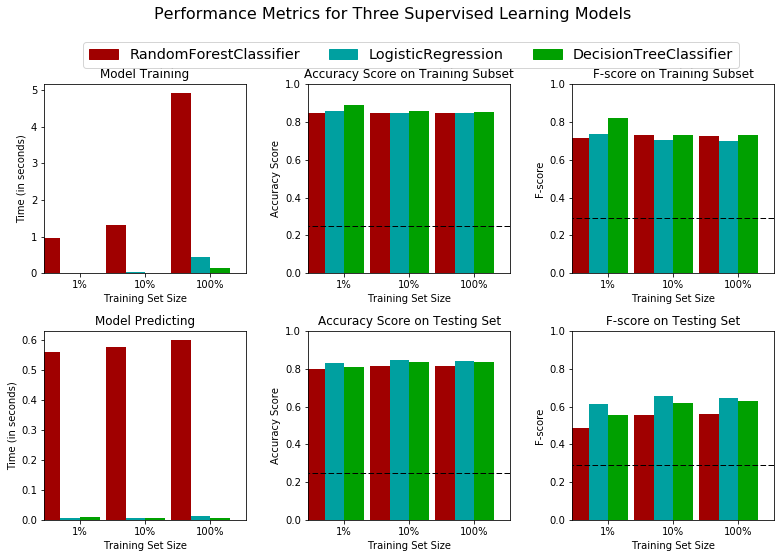

In [15]:
# 
# After Tuning
# 

#  Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#  Initialize the three models
clf_A = LogisticRegression(random_state= 0, penalty='l2', C=1)
clf_B = DecisionTreeClassifier(random_state= 0, min_samples_split=2, max_depth = 5)
clf_C = RandomForestClassifier(random_state=0, n_estimators=300, min_samples_split=50, max_depth=5)

#  Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(len(y_train)*0.1)
samples_1 = int(len(y_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

## Choosing the Best Model

* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.


Logistic Regression is the best.

(1) F score and accuracy is the best.
(2) It takes lots of time to train, but prediction time is lower.
(3) If the number of date increases, there isn't a big change of F score and accuracy.(slightly improved)

### Describing the Model in Layman's Terms



1. Regression allows us to predict an output based on some inputs. For instance, we can predicts someone's height based on their mother's height and father's height. This type of regression is called linear regression because our outcome variable is a continuous real number.

2. But what if we wanted to predict something that's not a continuous number like "Income is more than $50,000" or not ? Using ordinary linear regression won't work in this case because it doesn't make sense to treat our outcome as a continuous number.

3. Logistic regression works largely the same way linear regression works: it multiplies each input by a coefficient, sums them up, and adds a constant. In other words, it takes "features" about individuals whose census data is known (e.g., age, education, etc) and creates a model that assigns a "weight" to these features. If one feature is correlated to income, this feature's wegiht is more bigger. 

4. The output is actually the log of the odds ratio. In the example of predicting if it will rain tomorrow, the odds ratio is the odds that it will rain tomorrow divided by the odds that it won't rain. We then take the log of this ratio so that our output is a continuous real number, like with linear regression. This output doesn't make as much intuitive sense, but for some output y, we can apply the following transformation:(exp(y)/(1+exp(y))

https://www.quora.com/What-is-logistic-regression
https://www.quora.com/Logistic-Regression-Why-sigmoid-function

### Implementation: Model Tuning


In [16]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, make_scorer

# Initialize the classifier
clf = LogisticRegression()
#clf = DecisionTreeClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'random_state': [0], 'penalty': ['l1', 'l2'], 'C' : [1,100,10000]}
#parameters = {'random_state': [0], 'min_samples_split': [2,50,100], 'max_depth' :[3,5] }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)


# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8419
F-score on testing data: 0.6832

Optimized Model
------
Final accuracy score on the testing data: 0.8419
Final F-score on the testing data: 0.6832


In [17]:
print grid_fit.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### Final Model Evaluation


#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.2478      |    0.8419            |  0.8419      |
| F-score        |         0.2917    |        0.6832           |   0.6823      |


**Answer: **
(1)What is your optimized model's accuracy and F-score on the testing data?   
(2) Are these scores better or worse than the unoptimized model?   
    => Default value is the best.
        
(3) How do the results from your optimized model compare to the naive predictor benchmarks you found earlier ?    
    => Accuracy and F-score is highly improved. Hence we would say that this prediction model makes sense.


## Extracting Feature Importance


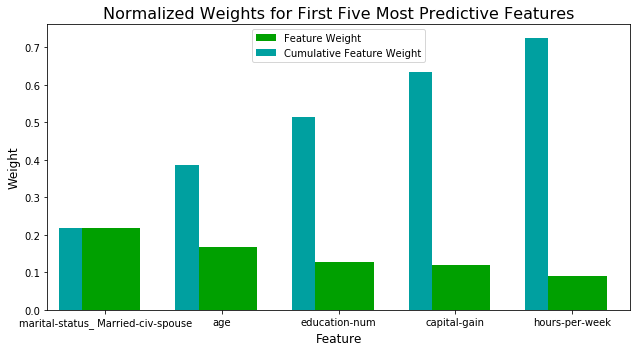

In [18]:
# mport a supervised learning model that has 'feature_importances_'
from sklearn.tree import DecisionTreeClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Feature Selection

In [19]:

# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

start = time()
# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()
costTime = end - start

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)


# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print ''
print "Previous Training time is : 0.488160133361816"
print "Present Training time is : ", costTime

Final Model trained on full data
------
Accuracy on testing data: 0.8419
F-score on testing data: 0.6832

Final Model trained on reduced data
------
Accuracy on testing data: 0.8266
F-score on testing data: 0.6481

Previous Training time is : 0.488160133361816
Present Training time is :  0.0884101390839


In [20]:
print 'The difference of F-socre is :', (0.6822-0.6483)/0.6822*100,'%'
print 'The difference of Accuracy is :',(0.8416-0.8268)/0.8416*100,'%'
print 'The difference of Training time is :', (0.488160133361816-0.331953048706)/0.488160133361816*100,'%'

The difference of F-socre is : 4.96921723835 %
The difference of Accuracy is : 1.75855513308 %
The difference of Training time is : 31.9991482262 %


### Effects of Feature Selection

(1)  Compared to all features, Top five features decreases about 4.9% in regard to F-score.
On the other hand, 1.7% in regard to Accuracy. If we consider F-score as  an important element,  top five features isn't good.


(2) If Training time was a important factor, we can adopt the reduced data because of 31.9% improvement.
